<a href="https://colab.research.google.com/github/AritraaBhattacharyya/Suicide_Rate_Analysis/blob/main/Suicide_Rate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Suicide Rate Analysis**

**Aditya Sonavane      (60009210142)**

**Aritra Bhattacharyya (60009210154)**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/master.csv')
display(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [ ]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [ ]:
df.drop(columns=["HDI for year"],axis=1,inplace=True)

In [ ]:
df.shape

(27820, 11)

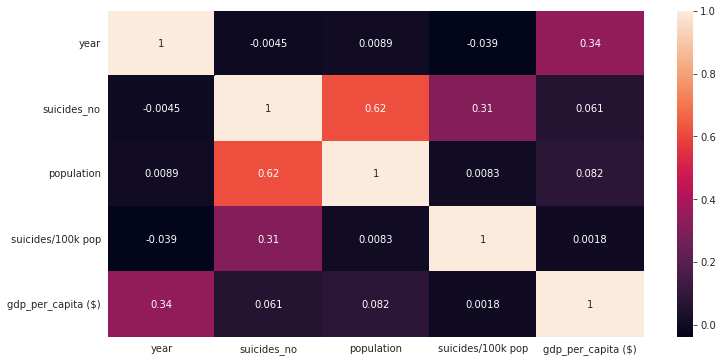

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr() , annot = True)
plt.show()

The heatmap above shows how the different attributes are correlated.

Suicide-Generation connection:

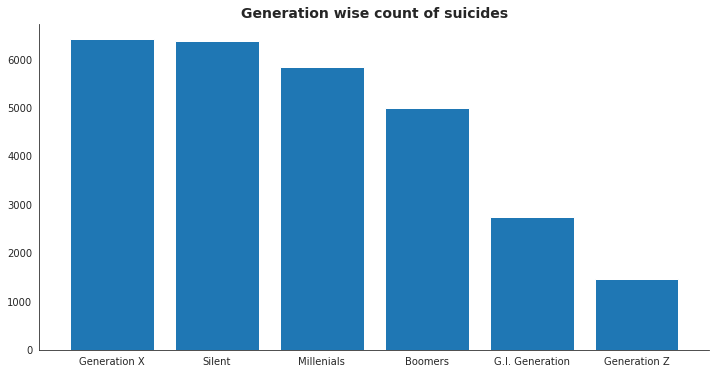

In [ ]:
plt.figure(figsize = (12, 6))
sns.set_style('white')

plt.bar(df["generation"].value_counts().index,
        df["generation"].value_counts())
plt.title(' Generation wise count of suicides ', fontsize = 14, fontweight = 'bold')

sns.despine()
plt.show()

The bas graph says that suicidal tendencies are most common for Generation X.

Suicide-Gender connection:

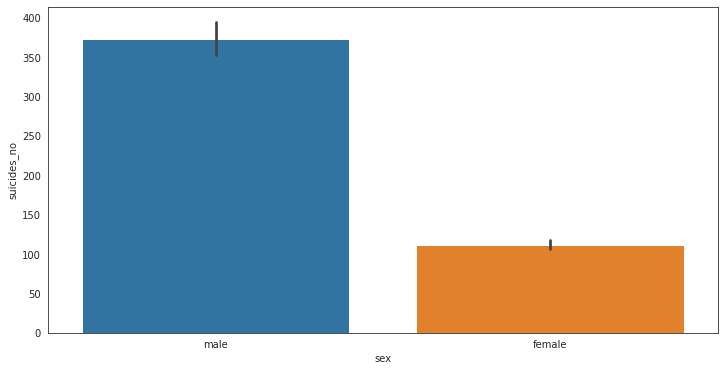

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'sex' , y  = 'suicides_no' , data = df)
plt.show()

Overall, more number of males have committed suicide than the females over the years.

Suicide-gender-age connection:

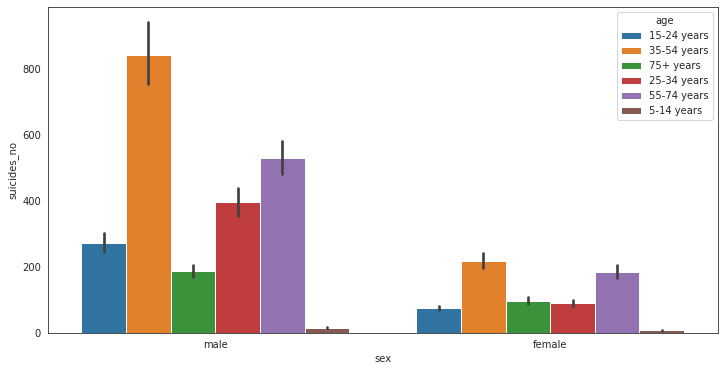

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'sex' , y  = 'suicides_no' ,hue = 'age', data = df)
plt.show()

For both the sex i.e male and female, the age group of 35-54 ha the most numbers of suicide and the age group of 5-14 has the least.

Suicide-Year connection:

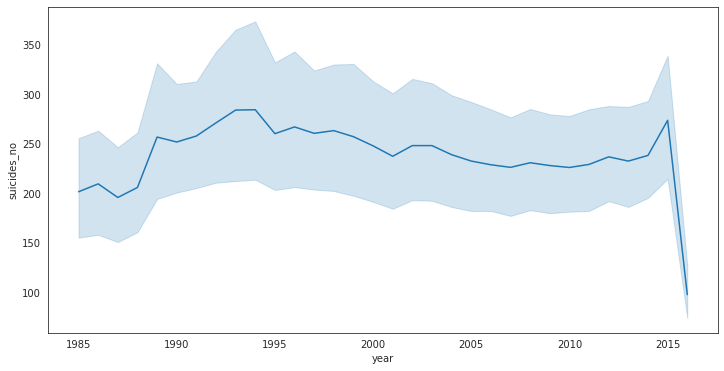

In [ ]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = 'year' , y = 'suicides_no' , data =df)
plt.show()

The line graph reveals that between 1985-2015, maximum suicides have been committed in the year of 1995. The number of suicides increases from 1985, becomes maximum in 1995, slowly starts decreasing thereafter.We also see a steep decrease in the number of suicides in the year of 2015.

Suicide-gender-year connection:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


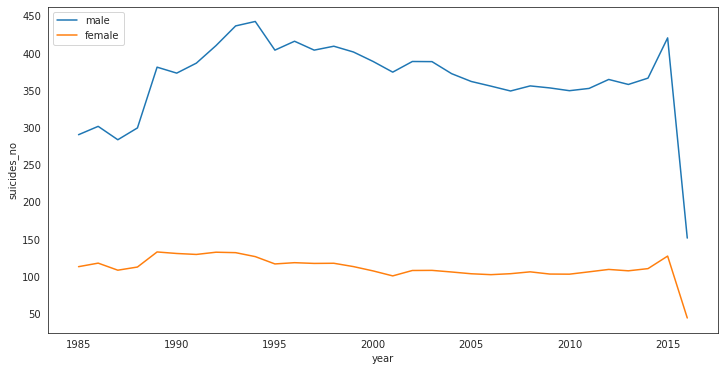

In [ ]:
plt.figure(figsize = (12, 6))
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

The trend of suicide rate for both, males and females are pretty much the same. But every single year, the numbers of male suicide commiters are way more than the female ones.

In [ ]:
df_suino = df.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100

df_pop = df.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum
df_total.head(10)

country  year
Albania  1987    0.002694
         1988    0.002279
         1989    0.002426
         1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
         1998    0.005112
dtype: float64

In [ ]:
country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

Suicide-Country connection:

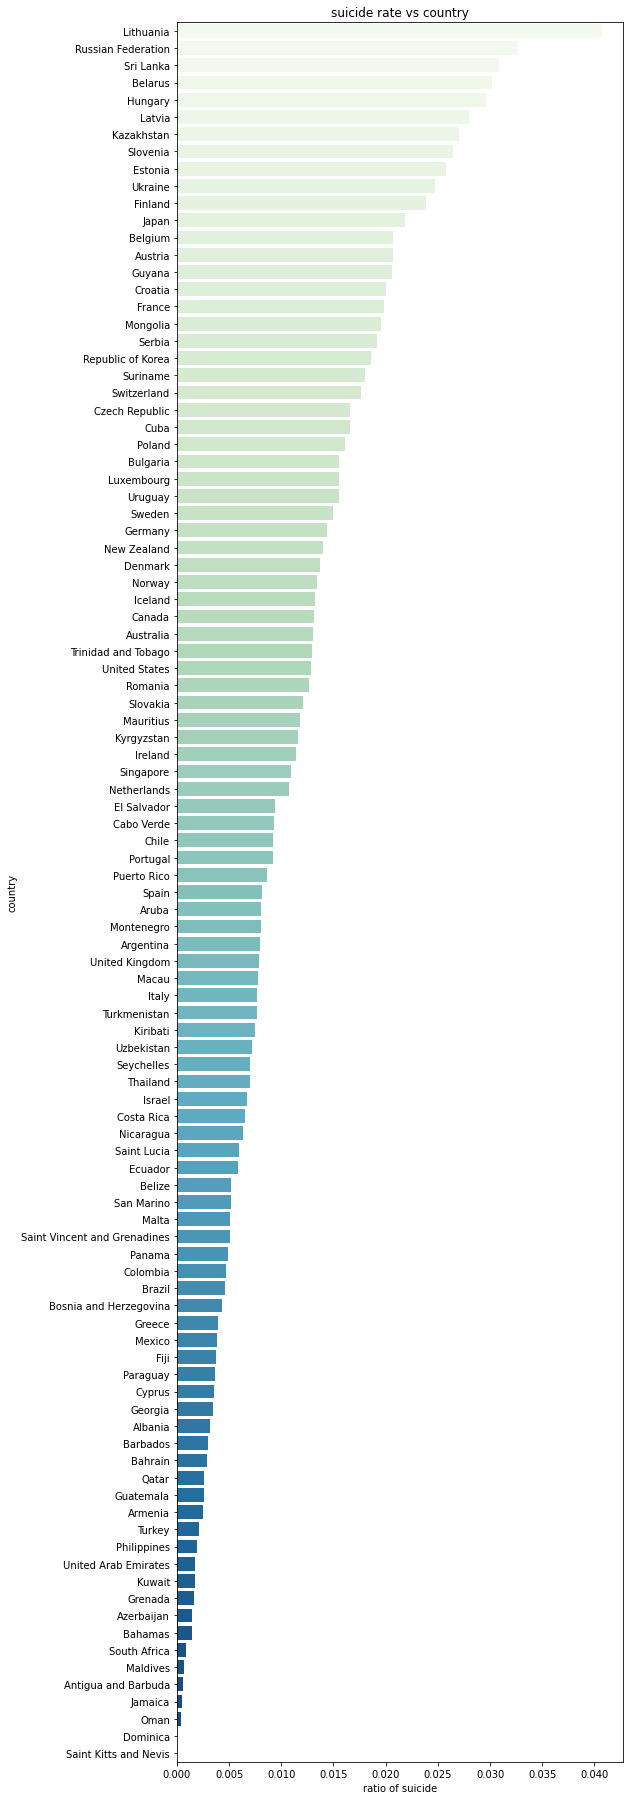

In [ ]:
plt.figure(figsize=(8,32))
sns.barplot(x=country_suicide[:],y=country_list[:], palette="GnBu")
plt.xlabel("ratio of suicide")
plt.ylabel("country")
plt.title("suicide rate vs country")
plt.show()

Lithuana has the highest suicide rate while Saint Kitts an Nevis have the lowest.